# üßæ Section 0: Glossary of Key Financial Metrics

| Field Name                      | Description |
|--------------------------------|-------------|
| **Date**                        | Quarterly timestamp of the financial report. |
| **Total Revenue**              | Combined revenue from all sources. |
| **Cost of Revenue**            | Costs directly related to providing Spotify's services (e.g., royalties, hosting). |
| **Gross Profit**               | Revenue minus Cost of Revenue. Indicates profitability before operational costs. |
| **Premium Revenue**            | Revenue generated from paid (ad-free) subscriptions. |
| **Premium Cost Revenue**       | Cost directly associated with premium services. |
| **Premium Gross Profit**       | Profit from Premium subscriptions after subtracting associated costs. |
| **Ad Revenue**                 | Revenue from Spotify‚Äôs free (ad-supported) user base. |
| **Ad Cost of Revenue**         | Cost of running ad-supported services (e.g., ad delivery, royalties). |
| **Ad Gross Profit**            | Profit from ads after deducting associated costs. |
| **MAUs**                       | Monthly Active Users ‚Äî total Spotify users active in a given month. |
| **Premium MAUs**               | Monthly Active Users with Premium subscriptions. |
| **Ad MAUs**                    | Monthly Active Users using the ad-supported version. |
| **Premium ARPU**               | Average Revenue Per User for Premium subscribers. |
| **Sales and Marketing Cost**   | Expenses for promoting Spotify and acquiring users. |
| **Research and Development Cost** | Expenses related to improving Spotify's technology and features. |
| **General and Administrative Cost** | Operational overhead ‚Äî salaries, legal, HR, etc. |


# üìä Section 1: Exploratory Data Analysis - Spotify Financial Forecasting

Welcome to the EDA notebook for the **Spotify Financial Forecasting** project.  
In this notebook, we will explore the dataset to understand:

- Monthly trends in revenue, expenses, and premium users.
- Relationships between these variables.
- Prepare data for time series forecasting.

Let's begin with importing necessary libraries and loading the dataset.


# üß∞ Section 2: Import Libraries & Load Data

In [1]:
# Importing core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional for Jupyter
%matplotlib inline

# Load the Spotify dataset
df = pd.read_csv("data/spotify_financials.csv")

# Display first few rows
df.head()

Date  Total Revenue  Cost of Revenue  Gross Profit  Premium Revenue  \
0  31-03-2023         3042.0           2276.0         776.0           2713.0   
1  31-12-2022         3166.0           2365.0         801.0           2717.0   
2  30-09-2022         3036.0           2286.0         750.0           2651.0   
3  30-06-2022         2864.0           2160.0         704.0           2504.0   
4  31-03-2022         2661.0           1990.0         671.0           2379.0   

   Premium Cost Revenue  Premium Gross Profit  Ad Revenue  Ad Cost of revenue  \
0                1937.0                 776.0       329.0               339.0   
1                1939.0                 778.0       449.0               426.0   
2                1908.0                 743.0       385.0               378.0   
3                1804.0                 700.0       360.0               356.0   
4                1704.0                 675.0       282.0               286.0   

   Ad gross Profit   MAUs  Premium MAUs  Ad MAUs  Premium ARPU  \
0            -10.0  515.0         210.0    317.0          4.32   
1             23.0  489.0         205.0    295.0          4.55   
2              7.0  456.0         195.0    273.0          4.63   
3              4.0  433.0         188.0    265.0          4.54   
4             -4.0  422.0         182.0    252.0          4.38   

   Sales and Marketing Cost  Research and Development Cost  \
0                     347.0                          435.0   
1                     453.0                          415.0   
2                     432.0                          386.0   
3                     391.0                          336.0   
4                     296.0                          250.0   

   Genreal and Adminstraive Cost  
0                          140.0  
1                          164.0  
2                          160.0  
3                          171.0  
4                          131.0

# üìã Section 3: Basic Info & Data Cleaning

## üßπ Step 1: Data Overview & Cleaning

In this step, we'll:

- View the basic structure of the dataset.
- Rename columns for ease of use.
- Convert the `Date` column to datetime format.
- Check for missing values and data consistency.
- Set `Date` as the index for time series analysis.


In [2]:
# View basic info
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Rename columns for easier access (lowercase + underscores)
df.rename(columns={
    'Date': 'date',
    'Total Revenue': 'total_revenue',
    'Cost of Revenue': 'cost_of_revenue',
    'Gross Profit': 'gross_profit',
    'Premium Revenue': 'premium_revenue',
    'Premium Cost Revenue': 'premium_cost',
    'Premium Gross Profit': 'premium_gross_profit',
    'Ad Revenue': 'ad_revenue',
    'Ad Cost of revenue': 'ad_cost',
    'Ad gross Profit': 'ad_gross_profit',
    'MAUs': 'maus',
    'Premium MAUs': 'premium_maus',
    'Ad MAUs': 'ad_maus',
    'Premium ARPU': 'premium_arpu',
    'Sales and Marketing Cost': 'sales_marketing_cost',
    'Research and Development Cost': 'r_and_d_cost',
    'Genreal and Adminstraive Cost': 'g_and_a_cost'
}, inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# Display first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           26 non-null     object 
 1   Total Revenue                  25 non-null     float64
 2   Cost of Revenue                25 non-null     float64
 3   Gross Profit                   25 non-null     float64
 4   Premium Revenue                25 non-null     float64
 5   Premium Cost Revenue           25 non-null     float64
 6   Premium Gross Profit           25 non-null     float64
 7   Ad Revenue                     25 non-null     float64
 8   Ad Cost of revenue             25 non-null     float64
 9   Ad gross Profit                25 non-null     float64
 10  MAUs                           25 non-null     float64
 11  Premium MAUs                   25 non-null     float64
 12  Ad MAUs                        25 non-null     float

C:\Users\gunav\AppData\Local\Temp\ipykernel_13844\372625496.py:29: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


total_revenue  cost_of_revenue  gross_profit  premium_revenue  \
date                                                                        
2023-03-31         3042.0           2276.0         776.0           2713.0   
2022-12-31         3166.0           2365.0         801.0           2717.0   
2022-09-30         3036.0           2286.0         750.0           2651.0   
2022-06-30         2864.0           2160.0         704.0           2504.0   
2022-03-31         2661.0           1990.0         671.0           2379.0   

            premium_cost  premium_gross_profit  ad_revenue  ad_cost  \
date                                                                  
2023-03-31        1937.0                 776.0       329.0    339.0   
2022-12-31        1939.0                 778.0       449.0    426.0   
2022-09-30        1908.0                 743.0       385.0    378.0   
2022-06-30        1804.0                 700.0       360.0    356.0   
2022-03-31        1704.0                 675.0       282.0    286.0   

            ad_gross_profit   maus  premium_maus  ad_maus  premium_arpu  \
date                                                                      
2023-03-31            -10.0  515.0         210.0    317.0          4.32   
2022-12-31             23.0  489.0         205.0    295.0          4.55   
2022-09-30              7.0  456.0         195.0    273.0          4.63   
2022-06-30              4.0  433.0         188.0    265.0          4.54   
2022-03-31             -4.0  422.0         182.0    252.0          4.38   

            sales_marketing_cost  r_and_d_cost  g_and_a_cost  
date                                                          
2023-03-31                 347.0         435.0         140.0  
2022-12-31                 453.0         415.0         164.0  
2022-09-30                 432.0         386.0         160.0  
2022-06-30                 391.0         336.0         171.0  
2022-03-31                 296.0         250.0         131.0

## üìä Step 2: Summary Statistics & Trend Analysis

In this step, we will:

- Generate basic summary statistics to understand data distribution.
- Visualize overall trends in key metrics such as:
  - Total Revenue
  - Gross Profit
  - Premium & Ad Revenue
  - MAUs (Monthly Active Users)
  - Costs like Sales & Marketing, R&D


In [3]:
# Summary statistics
df.describe().T

count         mean         std     min       25%  \
total_revenue          25.0  1949.200000  688.571468  902.00  1449.000   
cost_of_revenue        25.0  1448.320000  511.590634  775.00  1010.000   
gross_profit           25.0   501.280000  188.493484  105.00   373.000   
premium_revenue        25.0  1721.400000  599.337203  828.00  1210.000   
premium_cost           25.0  1247.040000  409.621419  686.00   894.000   
premium_gross_profit   25.0   474.360000  191.566977  118.00   316.000   
ad_revenue             25.0   215.760000  107.578762   74.00   130.000   
ad_cost                25.0   201.680000  105.019332   87.00   115.000   
ad_gross_profit        25.0    14.080000   15.739864  -16.00     4.000   
maus                   25.0   294.720000  117.212599  131.00   191.000   
premium_maus           25.0   130.080000   49.435918   52.00    87.000   
ad_maus                25.0   172.520000   71.702580   82.00   109.000   
premium_arpu           26.0     4.702308    0.452560    4.12     4.385   
sales_marketing_cost   25.0   243.840000   95.165505  110.00   172.000   
r_and_d_cost           25.0   203.000000  101.236522   80.00   135.000   
g_and_a_cost           25.0   102.360000   34.507101   42.00    73.000   

                          50%        75%     max  
total_revenue         1855.00  2501.0000  3166.0  
cost_of_revenue       1381.00  1833.0000  2365.0  
gross_profit           479.00   668.0000   801.0  
premium_revenue       1700.00  2178.0000  2717.0  
premium_cost          1219.00  1545.0000  1939.0  
premium_gross_profit   481.00   633.0000   778.0  
ad_revenue             175.00   282.0000   449.0  
ad_cost                157.00   286.0000   426.0  
ad_gross_profit         18.00    25.0000    42.0  
maus                   286.00   381.0000   515.0  
premium_maus           130.00   172.0000   210.0  
ad_maus                163.00   220.0000   317.0  
premium_arpu             4.64     4.8825     6.0  
sales_marketing_cost   236.00   294.0000   453.0  
r_and_d_cost           173.00   253.0000   435.0  
g_and_a_cost           102.00   126.0000   171.0

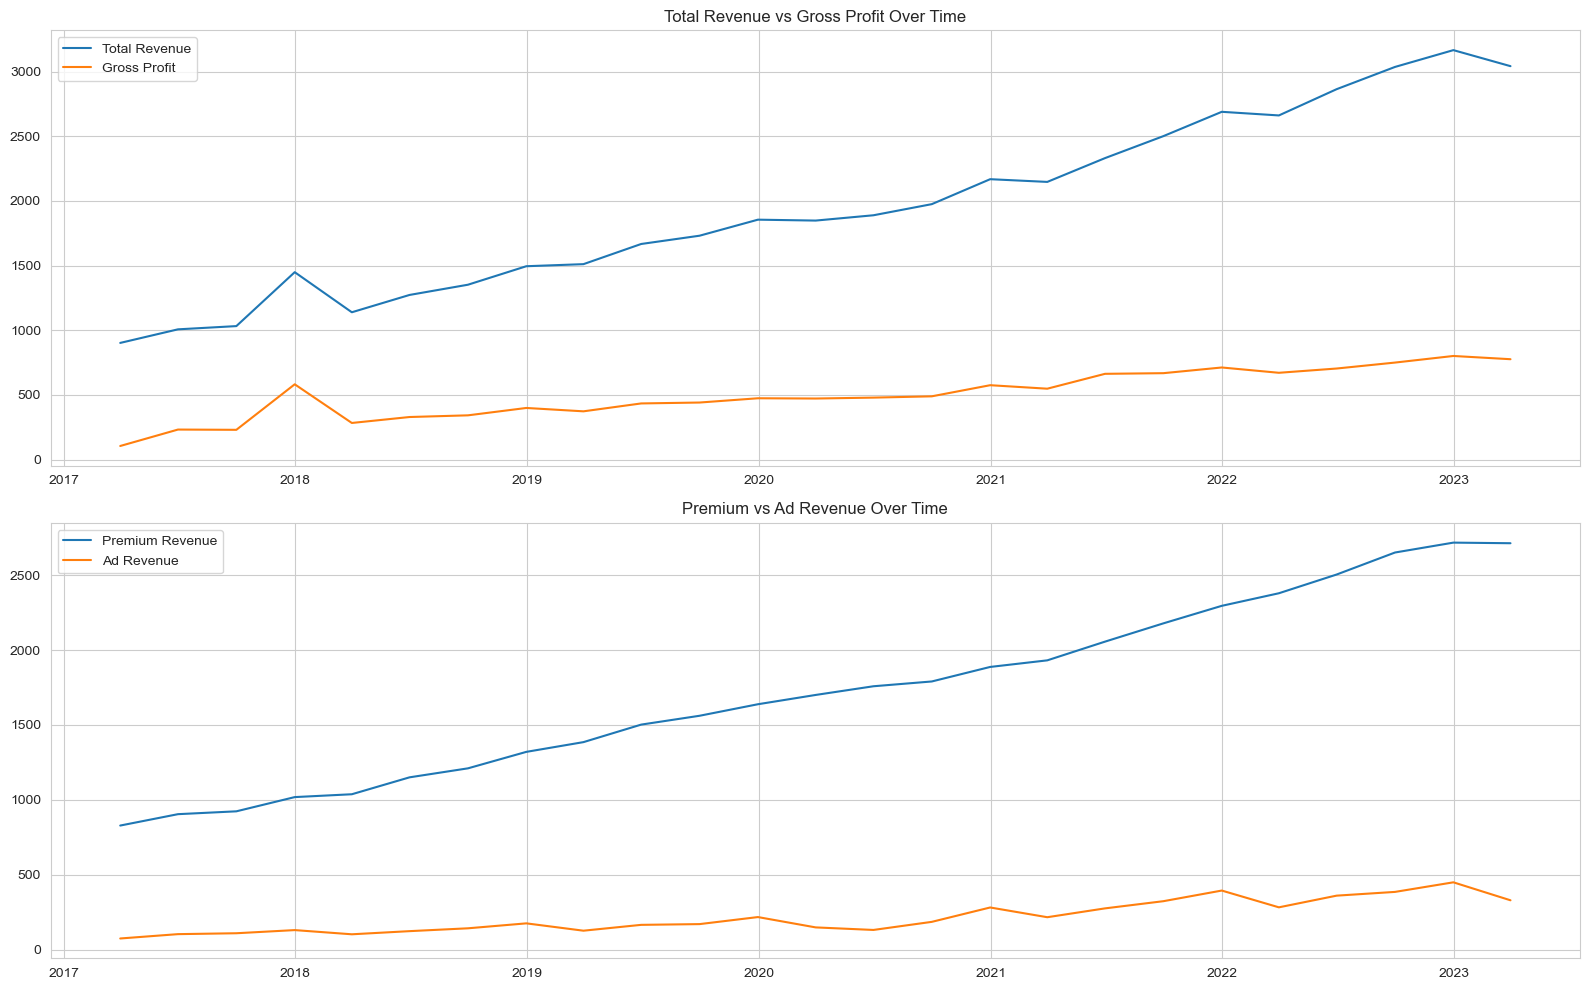

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

# Plot Revenue and Gross Profit
plt.subplot(2, 1, 1)
plt.plot(df.index, df['total_revenue'], label='Total Revenue')
plt.plot(df.index, df['gross_profit'], label='Gross Profit')
plt.title('Total Revenue vs Gross Profit Over Time')
plt.legend()

# Plot Premium and Ad Revenue
plt.subplot(2, 1, 2)
plt.plot(df.index, df['premium_revenue'], label='Premium Revenue')
plt.plot(df.index, df['ad_revenue'], label='Ad Revenue')
plt.title('Premium vs Ad Revenue Over Time')
plt.legend()

plt.tight_layout()
plt.show()


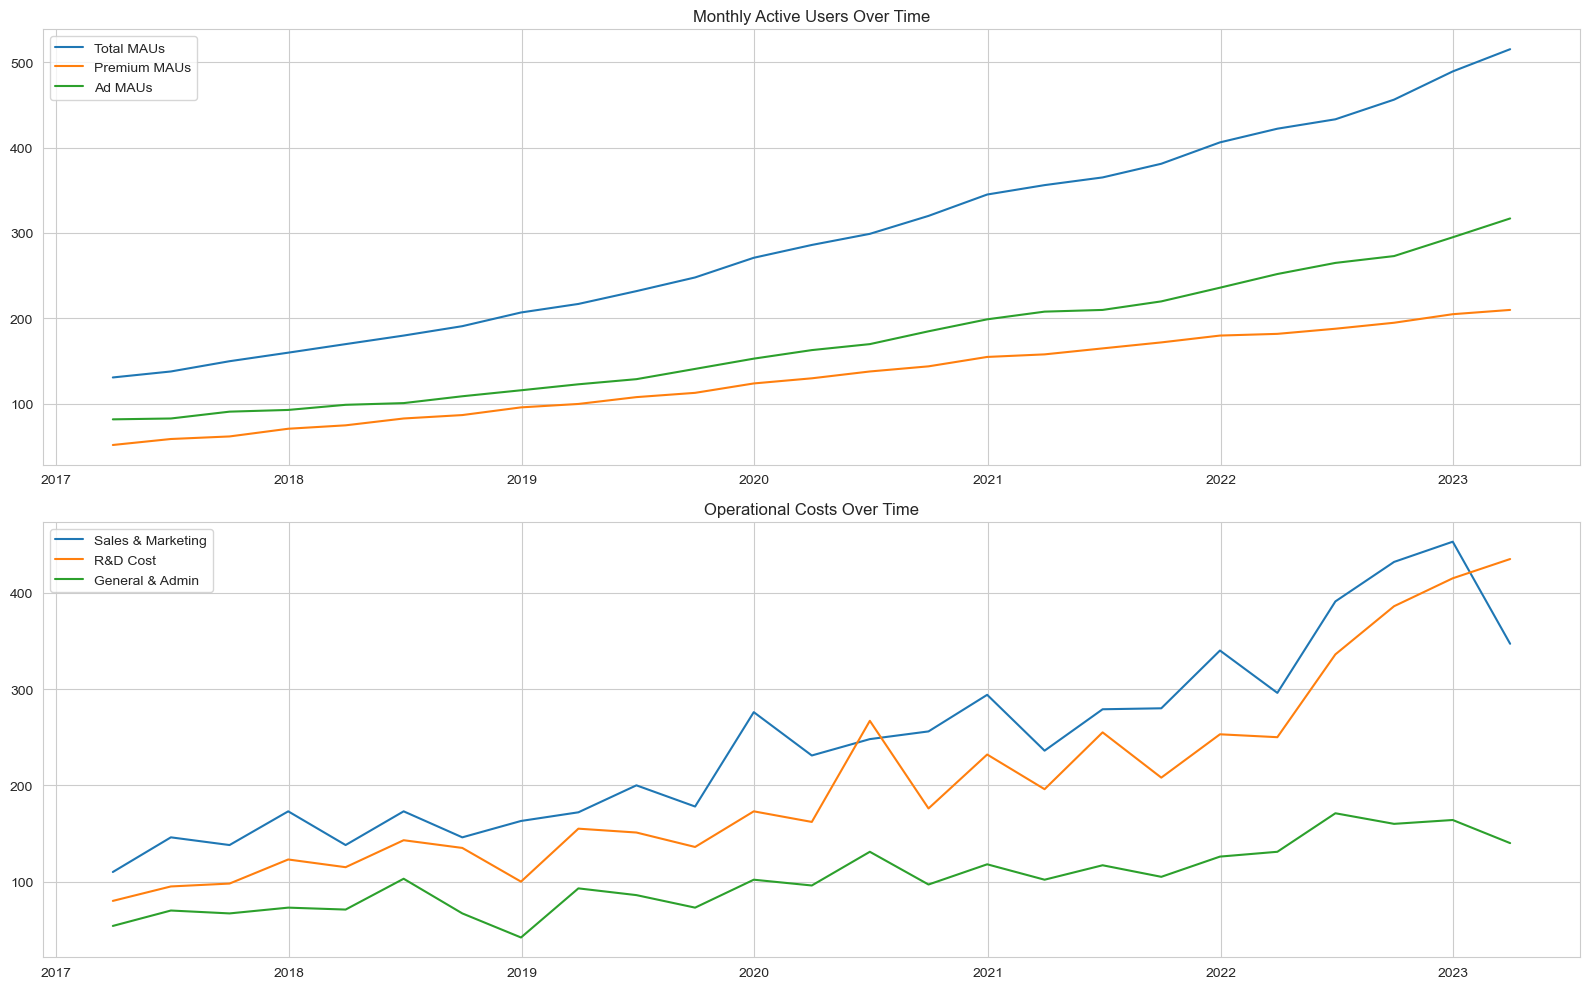

In [5]:
plt.figure(figsize=(16, 10))

# MAUs trends
plt.subplot(2, 1, 1)
plt.plot(df.index, df['maus'], label='Total MAUs')
plt.plot(df.index, df['premium_maus'], label='Premium MAUs')
plt.plot(df.index, df['ad_maus'], label='Ad MAUs')
plt.title('Monthly Active Users Over Time')
plt.legend()

# Cost trends
plt.subplot(2, 1, 2)
plt.plot(df.index, df['sales_marketing_cost'], label='Sales & Marketing')
plt.plot(df.index, df['r_and_d_cost'], label='R&D Cost')
plt.plot(df.index, df['g_and_a_cost'], label='General & Admin')
plt.title('Operational Costs Over Time')
plt.legend()

plt.tight_layout()
plt.show()

## üìà Trend Analysis with Smoothed Lines

Using Seaborn‚Äôs enhanced line plotting and lowess smoothing (locally weighted regression), we present clean, modern trendlines to understand historical behavior and justify future forecasting.


In [6]:
print(df.index.name)

date


In [7]:
# Reset index to make 'date' a column again
df = df.reset_index()

In [8]:
print(df.columns.tolist())

['date', 'total_revenue', 'cost_of_revenue', 'gross_profit', 'premium_revenue', 'premium_cost', 'premium_gross_profit', 'ad_revenue', 'ad_cost', 'ad_gross_profit', 'maus', 'premium_maus', 'ad_maus', 'premium_arpu', 'sales_marketing_cost', 'r_and_d_cost', 'g_and_a_cost']


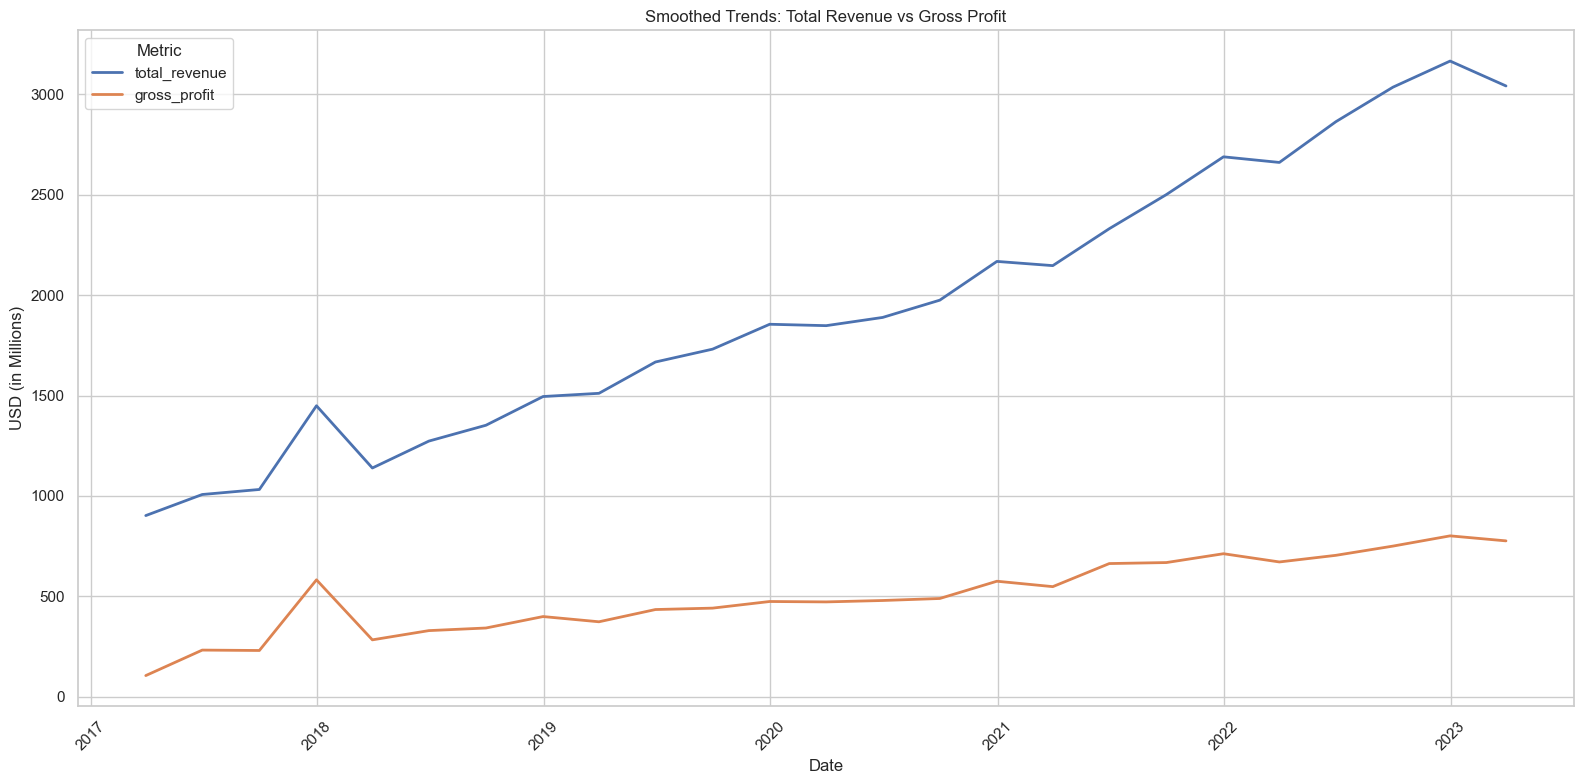

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")

# Melt DataFrame to use seaborn effectively
rev_profit_df = df[['date', 'total_revenue', 'gross_profit']].melt(id_vars='date', var_name='Metric', value_name='Amount')

sns.lineplot(data=rev_profit_df, x='date', y='Amount', hue='Metric', estimator=None, lw=2)
plt.title('Smoothed Trends: Total Revenue vs Gross Profit')
plt.xlabel('Date')
plt.ylabel('USD (in Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


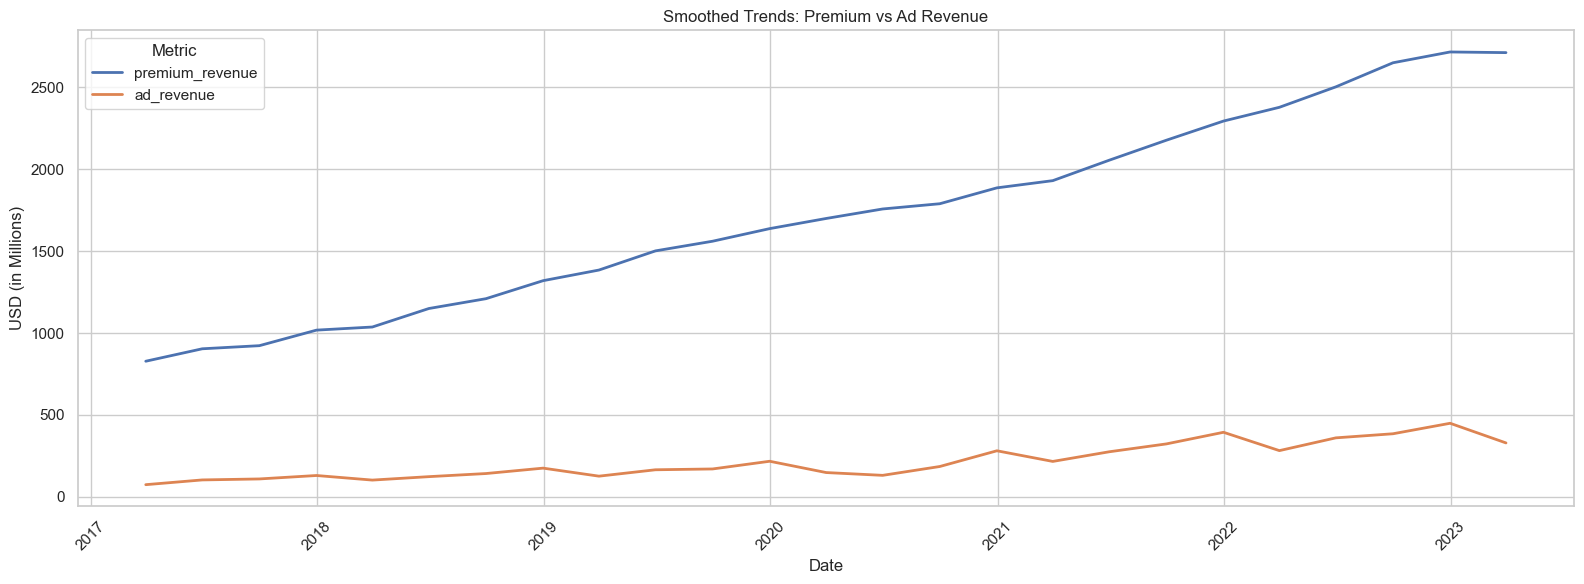

In [10]:
plt.figure(figsize=(16, 6))

rev_df = df[['date', 'premium_revenue', 'ad_revenue']].melt(id_vars='date', var_name='Metric', value_name='Amount')

sns.lineplot(data=rev_df, x='date', y='Amount', hue='Metric', estimator=None, lw=2)
plt.title('Smoothed Trends: Premium vs Ad Revenue')
plt.xlabel('Date')
plt.ylabel('USD (in Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


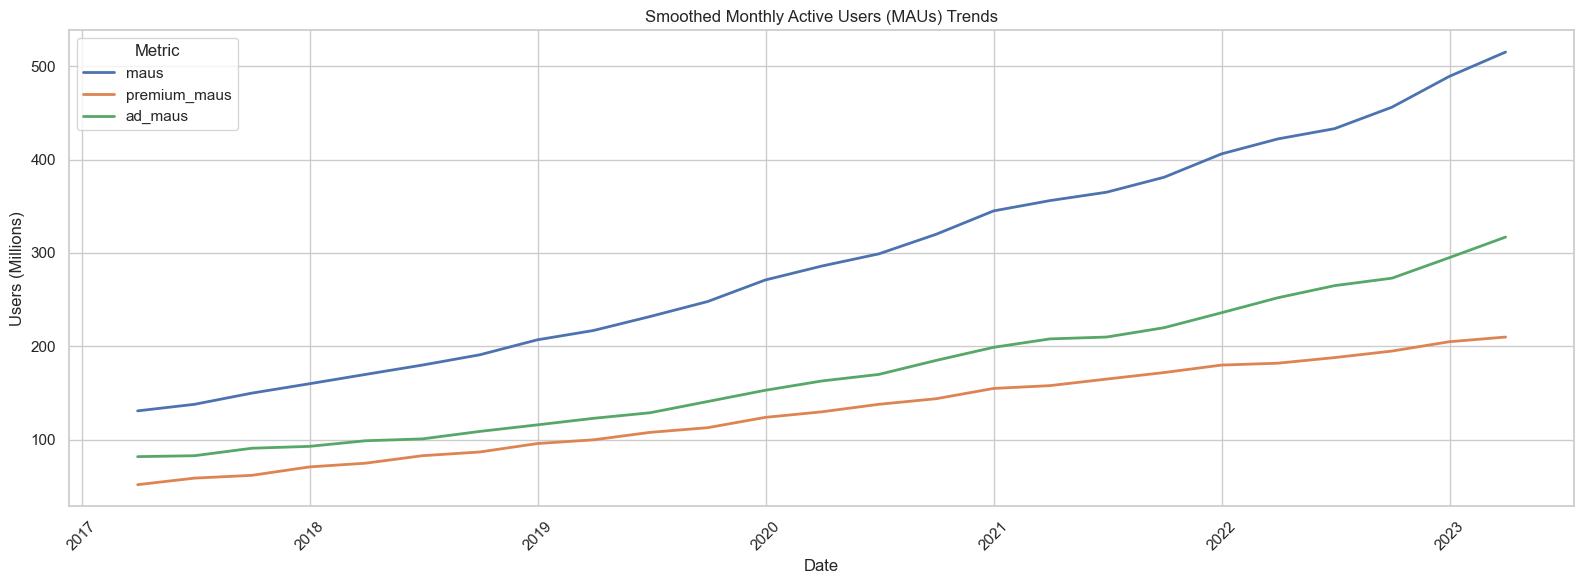

In [11]:
plt.figure(figsize=(16, 6))

mau_df = df[['date', 'maus', 'premium_maus', 'ad_maus']].melt(id_vars='date', var_name='Metric', value_name='Users (Millions)')

sns.lineplot(data=mau_df, x='date', y='Users (Millions)', hue='Metric', estimator=None, lw=2)
plt.title('Smoothed Monthly Active Users (MAUs) Trends')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### üí∞ Revenue Sources: Premium vs Ad

This chart highlights the trends in Premium Revenue and Ad Revenue over time. Identifying shifts in these streams helps assess Spotify‚Äôs monetization strategy and potential areas of focus for forecasting.


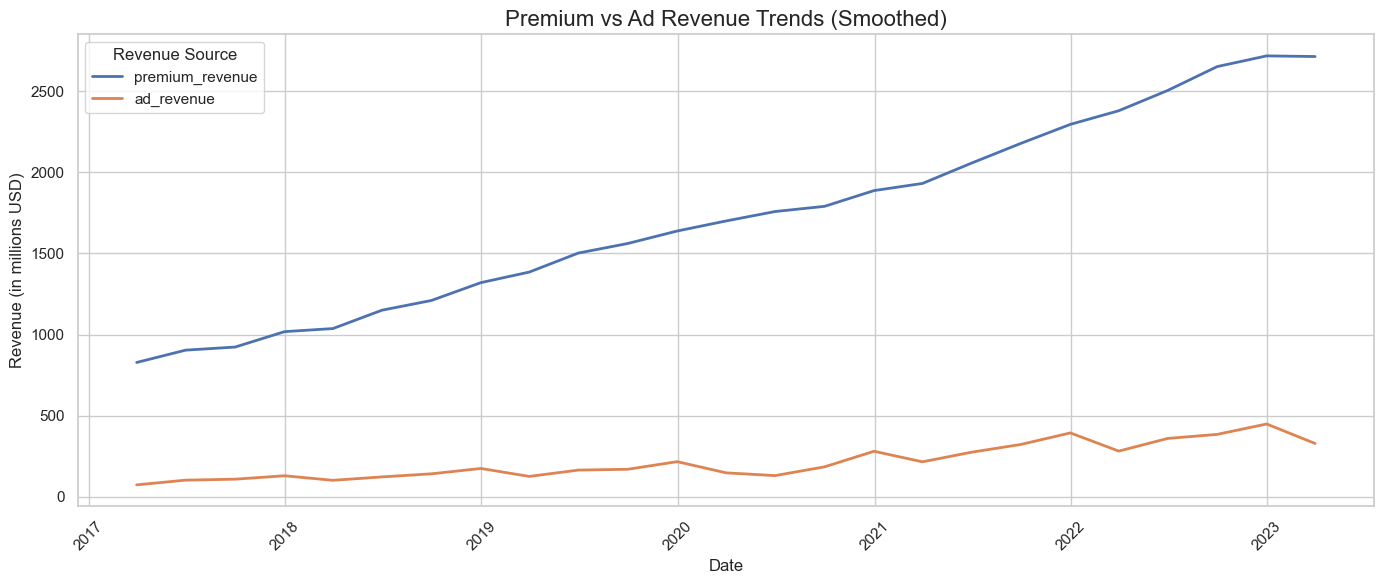

In [12]:
# Prepare data for seaborn
rev_sources_df = df[['date', 'premium_revenue', 'ad_revenue']].melt(id_vars='date', 
                                                                     var_name='Revenue Source', 
                                                                     value_name='Amount')

# Plotting with seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=rev_sources_df, x='date', y='Amount', hue='Revenue Source', lw=2)
plt.title('Premium vs Ad Revenue Trends (Smoothed)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Revenue (in millions USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## üìä  Glossary & Key Metrics

| **Term**                  | **Description**                                                                 |
|--------------------------|---------------------------------------------------------------------------------|
| Total Revenue            | Combined income from all sources (premium + ads).                               |
| Premium Revenue          | Income from Spotify subscriptions.                                              |
| Ad Revenue               | Income from advertising (free-tier users).                                      |
| Cost of Revenue          | Total cost to deliver the service (e.g., royalties, streaming infra).           |
| Gross Profit             | Total Revenue - Cost of Revenue.                                                |
| Premium/Ad Cost Revenue  | Respective costs for premium/ad services.                                       |
| MAUs                     | Monthly Active Users (Total, Premium, Ad-supported).                            |
| Premium ARPU             | Average Revenue Per Premium User.                                               |
| R&D / S&M / G&A Costs    | Research, Sales & Marketing, and General/Admin expenses.                        |

---

## üîç Key Insights from EDA (2017‚Äì2023)

### üí° 1. Revenue Growth is Premium-Driven
- **Premium Revenue** grew from **$828M (Q1 2017)** to **$2.7B (Q1 2023)** ‚Äî more than a **3x increase**.
- **Ad Revenue** saw minor growth: from **$74M** to **$329M** in the same period.
- This confirms that **Spotify‚Äôs primary revenue engine is its subscription model**.

---

### üí° 2. Gross Profit Mirrors Premium Trends
- **Premium Gross Profit** increased in sync with Premium Revenue, highlighting **consistent margins**.
- **Ad Gross Profit** remains much lower and even negative at times (e.g., **Q1 2023: -$10M**), indicating **ad segment inefficiencies or high costs**.

---

### üí° 3. MAUs Have Grown, But Premium Users Lead
- **Total MAUs** rose from **131M (Q1 2017)** to **515M (Q1 2023)**.
- **Premium MAUs** nearly **quadrupled**, indicating:
  - Higher customer retention.
  - Successful conversion from free-tier to paid users.
- **Ad MAUs** increased too, but at a slower pace.

---

### üí° 4. ARPU Is Stable with a Slight Downtrend
- **Premium ARPU** declined from **$5.46 (Q1 2017)** to **$4.32 (Q1 2023)**.
- Suggests:
  - **Global expansion** into markets with lower pricing.
  - **Discount plans** or family/student bundles impacting ARPU.

---

### üí° 5. Costs Are Rising, But So Is Efficiency
- **Cost of Revenue** grew, but at a slower rate than revenue.
- **Sales & Marketing** and **R&D** costs increased, signaling:
  - Stronger brand push.
  - Continued product innovation.
- **Gross Profit** also improved, indicating better **operational efficiency**.

---

### üí° 6. Ad Business is Not Yet Profitable
- Ad Revenue often **barely covers Ad Cost**, and **Gross Profit is frequently low or negative**.
- Suggests Spotify might:
  - Be using ads mainly as a funnel to Premium.
  - Still be experimenting with the ad model's optimization.

---

### üìå Final Observations
- Spotify is steadily evolving from an ad-supported platform to a **premium subscription-first model**.
- With steady MAU growth and stable ARPU, the business shows strong fundamentals.
- Strategic focus should be:
  - Improving **ad profitability**.
  - **Innovating pricing models** to improve ARPU without losing users.


## üß† Step 6: Additional EDA Insights (Optional, but Powerful)

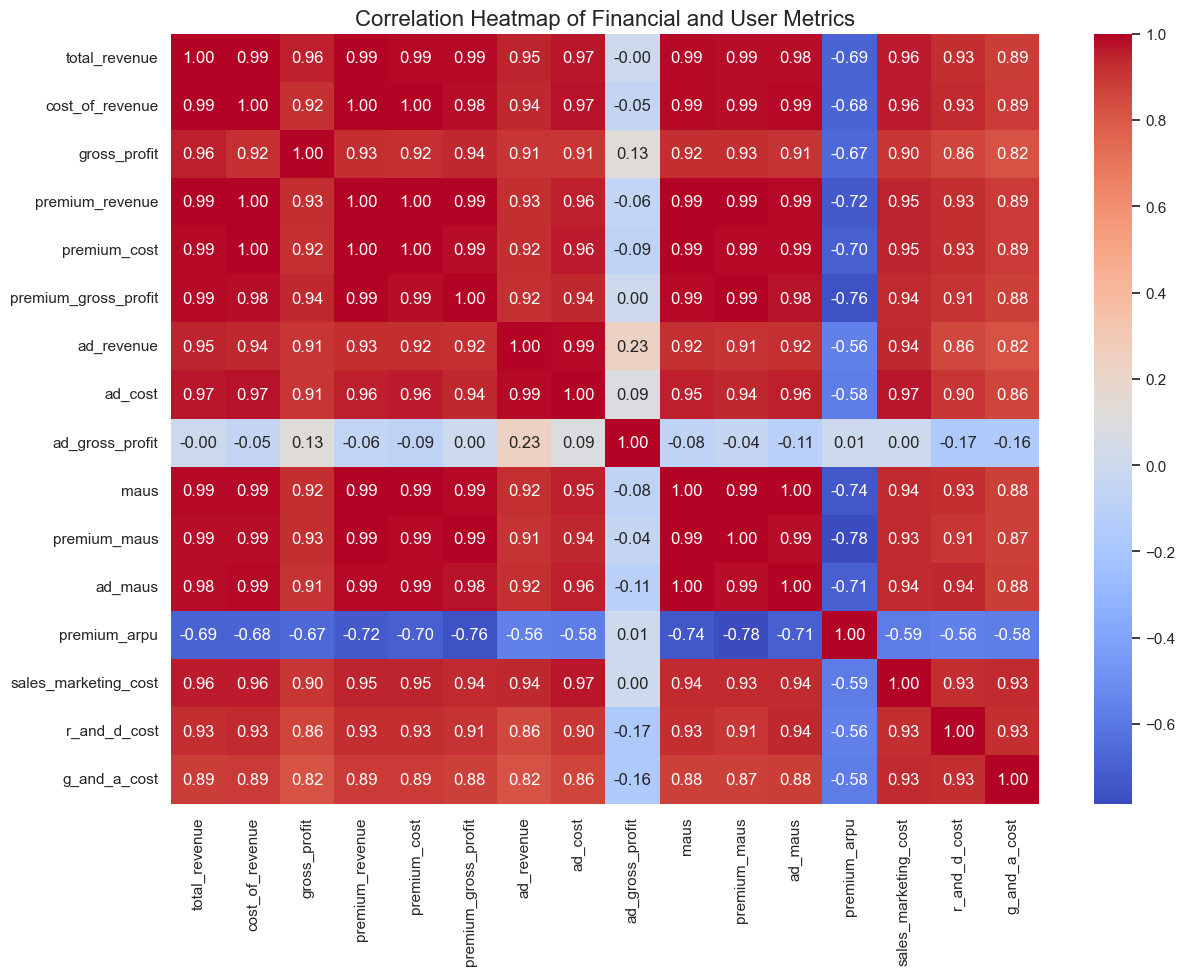

In [13]:
'''6.1 üî• Correlation Heatmap
Let‚Äôs visualize how different features relate to each other ‚Äî especially revenues, costs, and MAUs.'''

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Financial and User Metrics", fontsize=16)
plt.show()


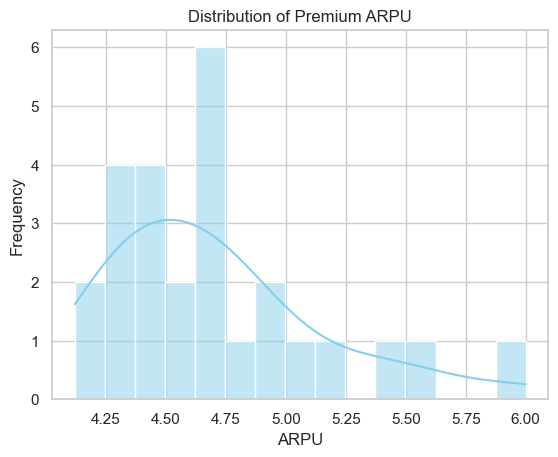

In [14]:
'''6.2 üìä Distribution of Key Metrics
Premium ARPU Distribution'''

sns.histplot(df['premium_arpu'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Premium ARPU")
plt.xlabel("ARPU")
plt.ylabel("Frequency")
plt.show()


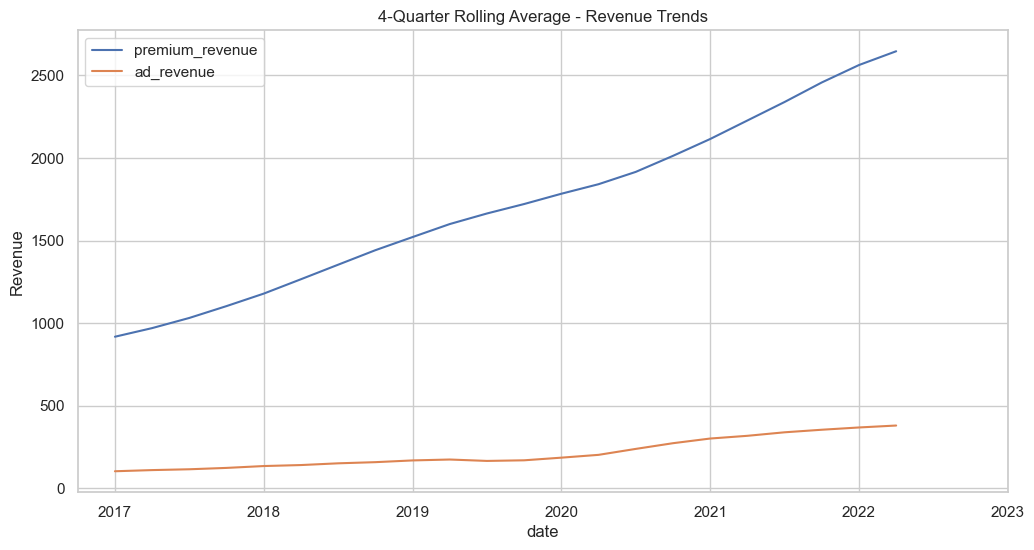

In [15]:
'''6.3 üìà Rolling Average for Smoother Trends'''

df_rolling = df.set_index('date')[['premium_revenue', 'ad_revenue']].rolling(window=4).mean()

df_rolling.plot(figsize=(12,6))
plt.title("4-Quarter Rolling Average - Revenue Trends")
plt.ylabel("Revenue")
plt.show()


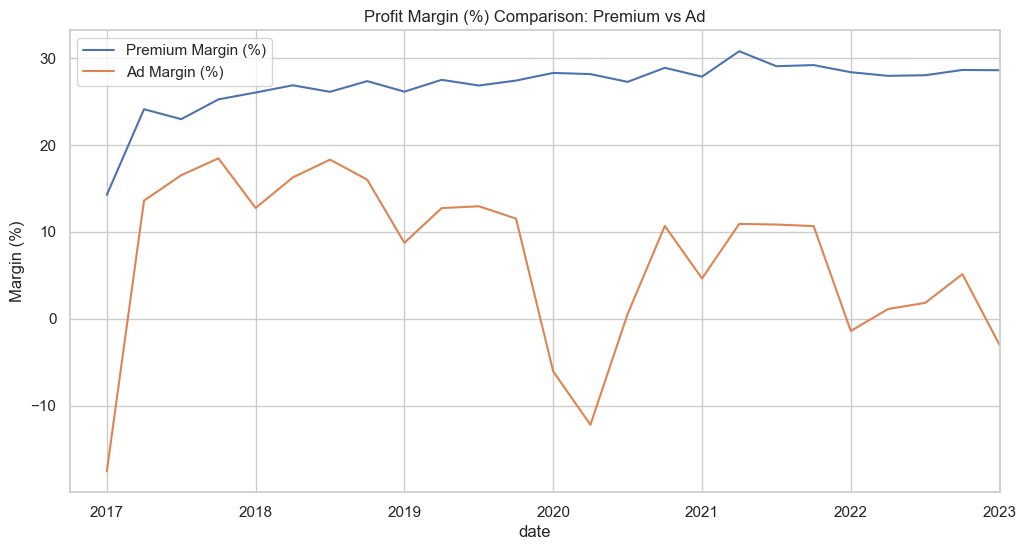

In [16]:
#6.4 üìê Profit Margins & Ratios

df["Premium Margin (%)"] = (df["premium_gross_profit"] / df["premium_revenue"]) * 100
df["Ad Margin (%)"] = (df["ad_gross_profit"] / df["ad_revenue"]) * 100
df[["date", "Premium Margin (%)", "Ad Margin (%)"]].set_index("date").plot(figsize=(12,6))
plt.title("Profit Margin (%) Comparison: Premium vs Ad")
plt.ylabel("Margin (%)")
plt.show()


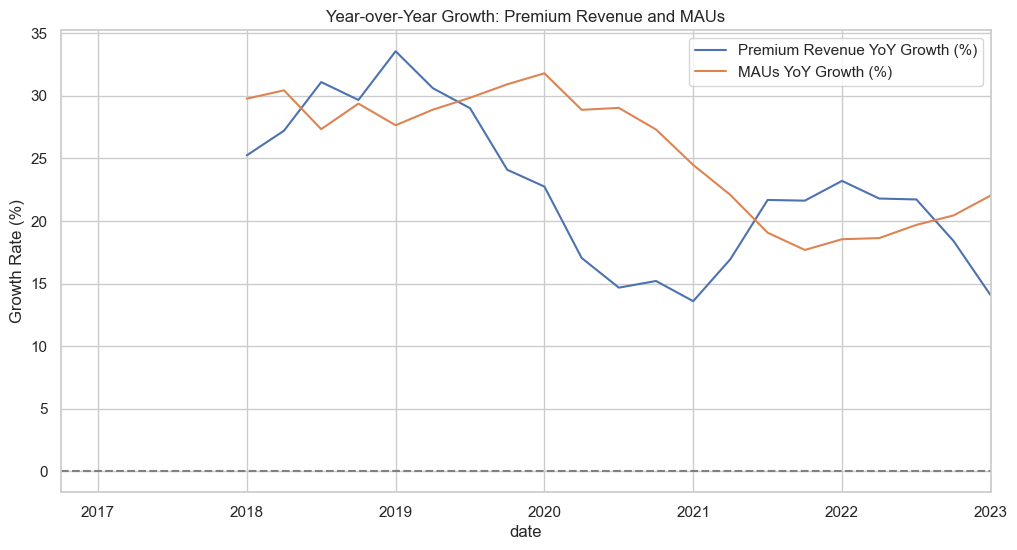

In [17]:
# 6.5 üìä Year-over-Year Growth Rate

df = df.sort_values("date")
df["Premium Revenue YoY Growth (%)"] = df["premium_revenue"].pct_change(periods=4) * 100
df["MAUs YoY Growth (%)"] = df["maus"].pct_change(periods=4) * 100

df.set_index("date")[["Premium Revenue YoY Growth (%)", "MAUs YoY Growth (%)"]].plot(figsize=(12,6))
plt.title("Year-over-Year Growth: Premium Revenue and MAUs")
plt.ylabel("Growth Rate (%)")
plt.axhline(0, color='gray', linestyle='--')
plt.show()


In [18]:
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include='number'), nan_policy='omit')
outliers = (abs(z_scores) > 3).any(axis=1)
print("Outliers found at these dates:")
print(df[outliers]["date"])

Outliers found at these dates:
24   2017-03-31
Name: date, dtype: datetime64[ns]


# Section 4: üß† Forecasting Plan using ARIMA
### ‚úÖ Top Features for Forecasting

| Category           | Feature Name       | Reason for Selection                                                               |
|--------------------|--------------------|-------------------------------------------------------------------------------------|
| üìä Revenue         | `total_revenue`    | Key metric to track business growth                                                |
| üí∞ Premium Growth  | `premium_revenue`  | Represents major revenue driver; grew significantly from 2017 to 2023              |
| üìà Users           | `maus`             | Indicates platform usage; essential for assessing product popularity               |
| üíé Premium Users   | `premium_maus`     | Tracks conversion to paying users ‚Äî vital for subscription models                 |
| üí∏ Monetization    | `premium_arpu`     | Reflects how well the company monetizes premium users                              |
| üìâ Costs           | `r_and_d_cost`     | Impacts profitability and shows innovation focus                                   |

> ‚ö†Ô∏è We can skip lower-impact columns like `ad_cost`, `ad_maus`, etc., unless needed later.


### ‚úÖ Step-by-Step Forecasting Flow for Each Column
We'll repeat the following 5 steps per column:
- Visualize the Time Series
- Check for Stationarity (ADF Test)
- Differencing if Needed
- Fit ARIMA Model
- Forecast Future Values (e.g., next 4 quarters)

üìä Let's Start with: total_revenue

### ‚úÖ ADF Test (Augmented Dickey-Fuller Test)
The ADF test is a statistical test used to check if a time series is stationary or not.

#### üìå What is Stationarity?
A time series is stationary if:

Its mean, variance, and covariance stay constant over time.

There is no trend, and it doesn‚Äôt depend on time.

Stationarity is important for ARIMA models, which assume the data is stationary before fitting.

#### üîç What the ADF Test Does:
It tests the null hypothesis:

H‚ÇÄ (null): The series is non-stationary (has a unit root).

H‚ÇÅ (alt): The series is stationary.

#### üìä Interpreting ADF Results:
Output	Meaning
ADF Statistic	A negative number; more negative ‚Üí more evidence against non-stationarity
p-value	If p < 0.05, reject H‚ÇÄ ‚Üí the series is stationary

### 1. üîÆ ARIMA Forecast: total_revenue

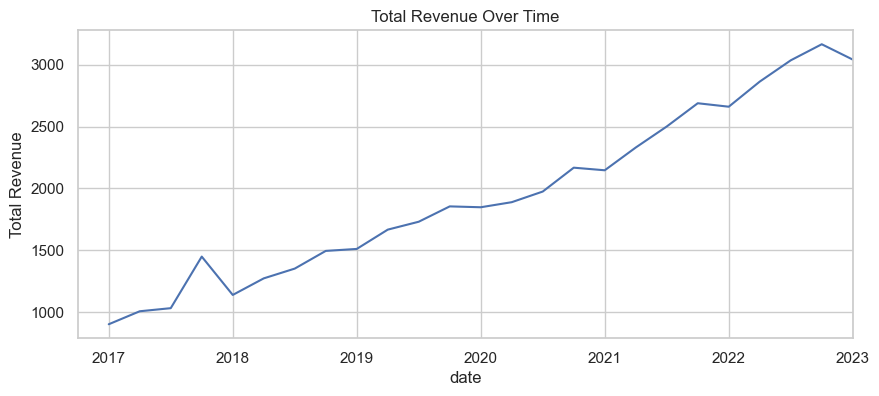

ADF Statistic: 3.3636195164990093
p-value: 1.0
                               SARIMAX Results                                
Dep. Variable:          total_revenue   No. Observations:                   26
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -161.314
Date:                Sat, 12 Apr 2025   AIC                            328.627
Time:                        11:21:46   BIC                            332.284
Sample:                    12-31-2016   HQIC                           329.641
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    694.719      0.000       0.997       1.003
ma.L1         -0.9974      0.217     -4.604      0.000      -1.422      -0.573
sigma

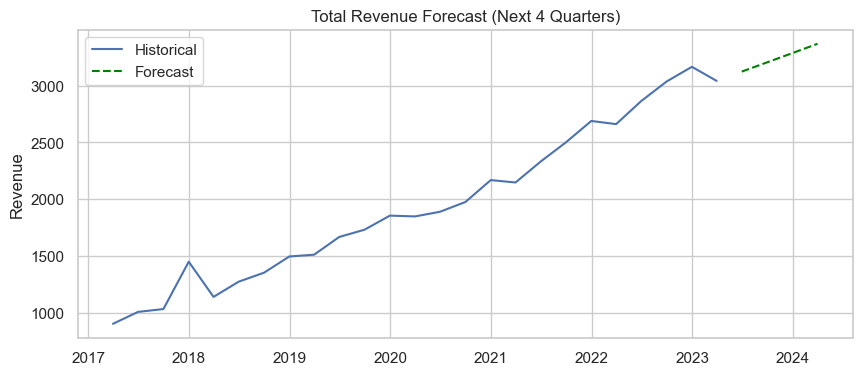

Forecasted Total Revenue:
2023-06-30    2791.014301
2023-09-30    2869.023533
2023-12-31    2947.027696
2024-03-31    3025.026791
Freq: QE-DEC, Name: predicted_mean, dtype: float64


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# --- Step 1: Load & prepare ---
df = df.copy()
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.sort_values('date')
df.set_index('date', inplace=True)

# --- Step 2: Visualize ---
df['total_revenue'].plot(figsize=(10, 4), title='Total Revenue Over Time')
plt.ylabel('Total Revenue')
plt.show()

# --- Step 3: Check for stationarity ---
result = adfuller(df['total_revenue'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# --- Step 4: Differencing if needed ---
if result[1] > 0.05:
    df_diff = df['total_revenue'].diff().dropna()
    d = 1
else:
    df_diff = df['total_revenue']
    d = 0

# --- Step 5: Fit ARIMA model ---
model = ARIMA(df['total_revenue'], order=(1, d, 1))
model_fit = model.fit()
print(model_fit.summary())

# --- Step 6: Forecast next 4 quarters ---
forecast_total_revenue = model_fit.forecast(steps=4)
forecast_dict = {}


forecast.index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=4, freq='Q')
forecast_dict['date'] = forecast.index
forecast_dict['total_revenue'] = forecast_total_revenue

# --- Step 7: Plot forecast ---
plt.figure(figsize=(10, 4))
plt.plot(df['total_revenue'], label='Historical')
plt.plot(forecast_total_revenue, label='Forecast', linestyle='--', color='green')
plt.title('Total Revenue Forecast (Next 4 Quarters)')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Optional: View Forecasted Values
print("Forecasted Total Revenue:")
print(forecast)

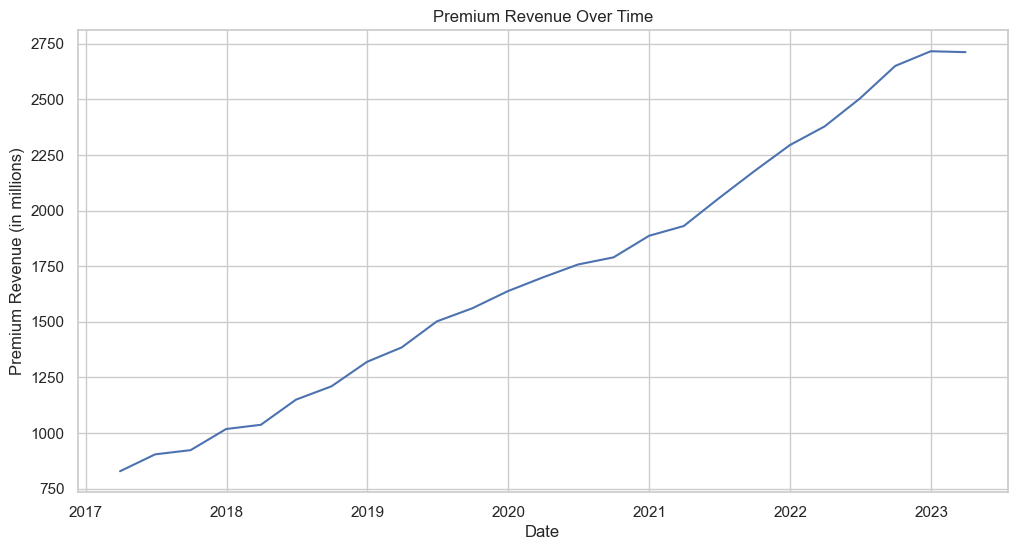

ADF Test Results:
ADF Statistic: 4.583946631082169
p-value: 1.0
üîÅ Series is non-stationary, applying first differencing
                               SARIMAX Results                                
Dep. Variable:        premium_revenue   No. Observations:                   26
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -132.557
Date:                Sat, 12 Apr 2025   AIC                            271.114
Time:                        11:21:50   BIC                            274.770
Sample:                    12-31-2016   HQIC                           272.128
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.002    481.857      0.000       0.996       1.004
ma.L1   

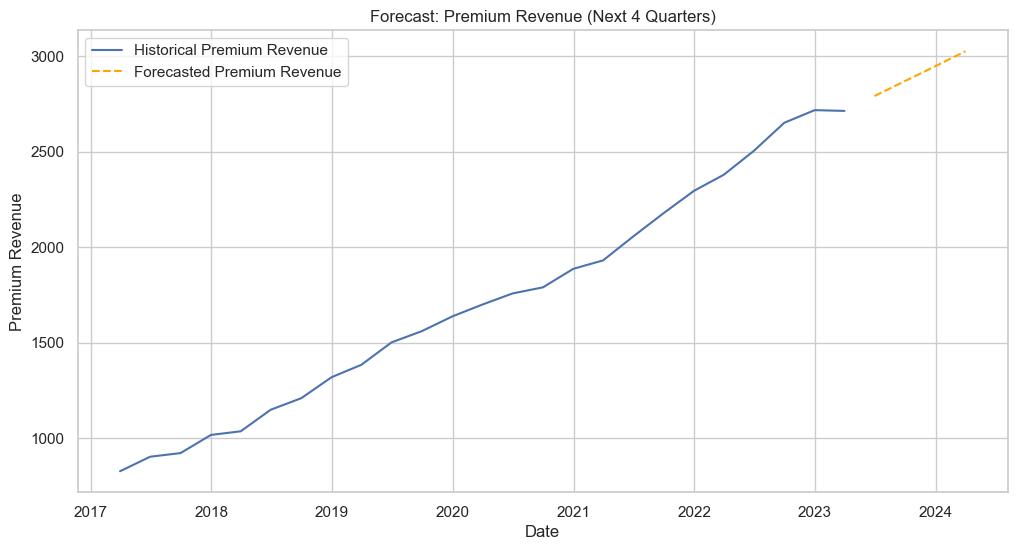

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


# --- Step 1: Visualize ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='premium_revenue')
plt.title("Premium Revenue Over Time")
plt.ylabel("Premium Revenue (in millions)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# --- Step 2: ADF Test ---
adf_result = adfuller(df['premium_revenue'].dropna())
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("‚úÖ Series is stationary")
    d = 0
    series_to_use = df['premium_revenue']
else:
    print("üîÅ Series is non-stationary, applying first differencing")
    d = 1
    df['premium_revenue_diff'] = df['premium_revenue'].diff()
    series_to_use = df['premium_revenue_diff'].dropna()

# --- Step 3: ARIMA Model ---
model = ARIMA(df['premium_revenue'], order=(1, d, 1))
model_fit = model.fit()
print(model_fit.summary())

# --- Step 4: Forecast ---
forecast_steps = 4  # Next 4 quarters
forecast_premium_revenue = model_fit.forecast(steps=forecast_steps)
forecast_dict['premium_revenue'] = forecast_premium_revenue

# --- Step 5: Plot Forecast ---
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='Q')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['premium_revenue'], label='Historical Premium Revenue')
plt.plot(future_dates, forecast_premium_revenue, label='Forecasted Premium Revenue', linestyle='--', color='orange')
plt.title("Forecast: Premium Revenue (Next 4 Quarters)")
plt.xlabel("Date")
plt.ylabel("Premium Revenue")
plt.legend()
plt.grid(True)
plt.show()


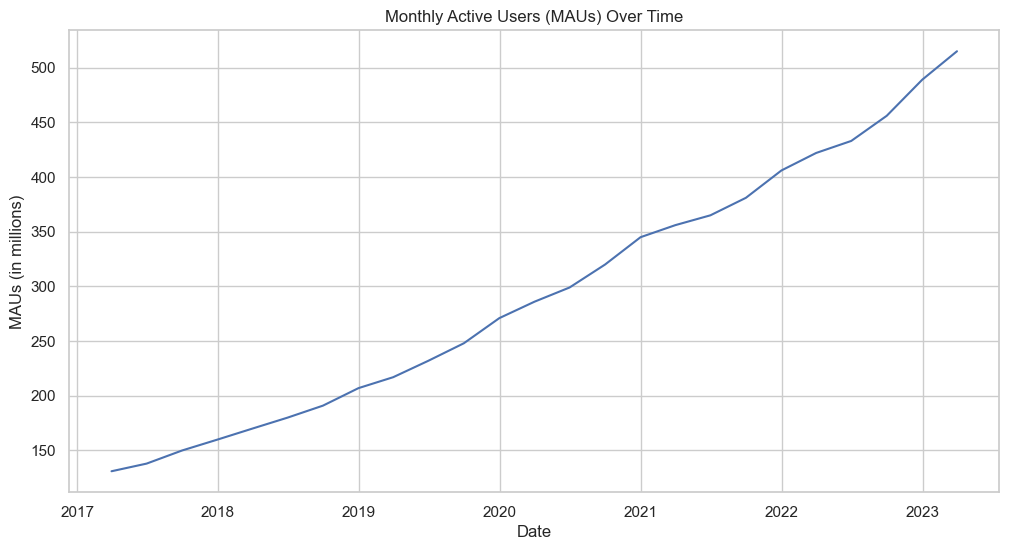

ADF Test Results:
ADF Statistic: 2.7021420825555116
p-value: 0.999087129302291
üîÅ Series is non-stationary, applying first differencing
                               SARIMAX Results                                
Dep. Variable:                   maus   No. Observations:                   26
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -86.745
Date:                Sat, 12 Apr 2025   AIC                            179.490
Time:                        11:21:55   BIC                            183.147
Sample:                    12-31-2016   HQIC                           180.505
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9930      0.021     47.734      0.000       0.952      

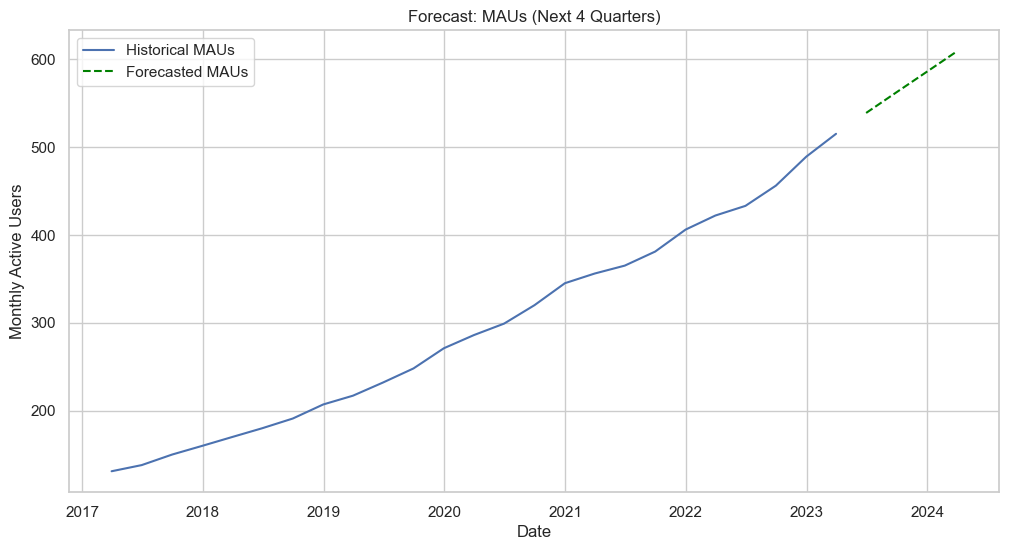

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# --- Step 1: Visualize ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='maus')
plt.title("Monthly Active Users (MAUs) Over Time")
plt.ylabel("MAUs (in millions)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# --- Step 2: ADF Test ---
adf_result = adfuller(df['maus'].dropna())
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("‚úÖ Series is stationary")
    d = 0
    series_to_use = df['maus']
else:
    print("üîÅ Series is non-stationary, applying first differencing")
    d = 1
    df['maus_diff'] = df['maus'].diff()
    series_to_use = df['maus_diff'].dropna()

# --- Step 3: ARIMA Model ---
model = ARIMA(df['maus'], order=(1, d, 1))
model_fit = model.fit()
print(model_fit.summary())

# --- Step 4: Forecast ---
forecast_steps = 4
forecast_maus = model_fit.forecast(steps=forecast_steps)
forecast_dict['maus'] = forecast_maus

# --- Step 5: Plot Forecast ---
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='Q')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['maus'], label='Historical MAUs')
plt.plot(future_dates, forecast_maus, label='Forecasted MAUs', linestyle='--', color='green')
plt.title("Forecast: MAUs (Next 4 Quarters)")
plt.xlabel("Date")
plt.ylabel("Monthly Active Users")
plt.legend()
plt.grid(True)
plt.show()


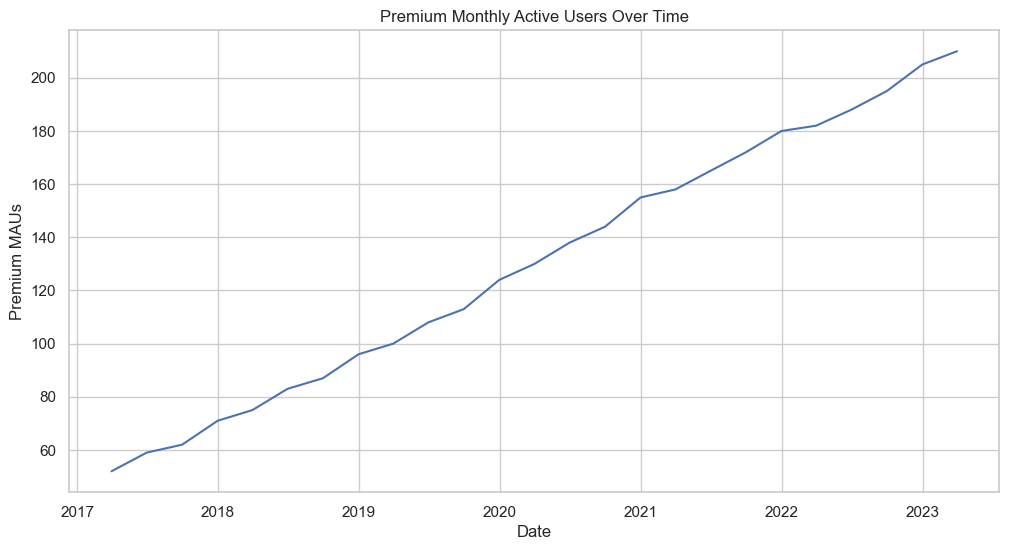

ADF Test Results:
ADF Statistic: 0.9791225402021992
p-value: 0.9940407091737145
üîÅ Series is non-stationary, applying first differencing
                               SARIMAX Results                                
Dep. Variable:           premium_maus   No. Observations:                   26
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -66.437
Date:                Sat, 12 Apr 2025   AIC                            138.874
Time:                        11:22:01   BIC                            142.531
Sample:                    12-31-2016   HQIC                           139.888
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    454.839      0.000       0.996     

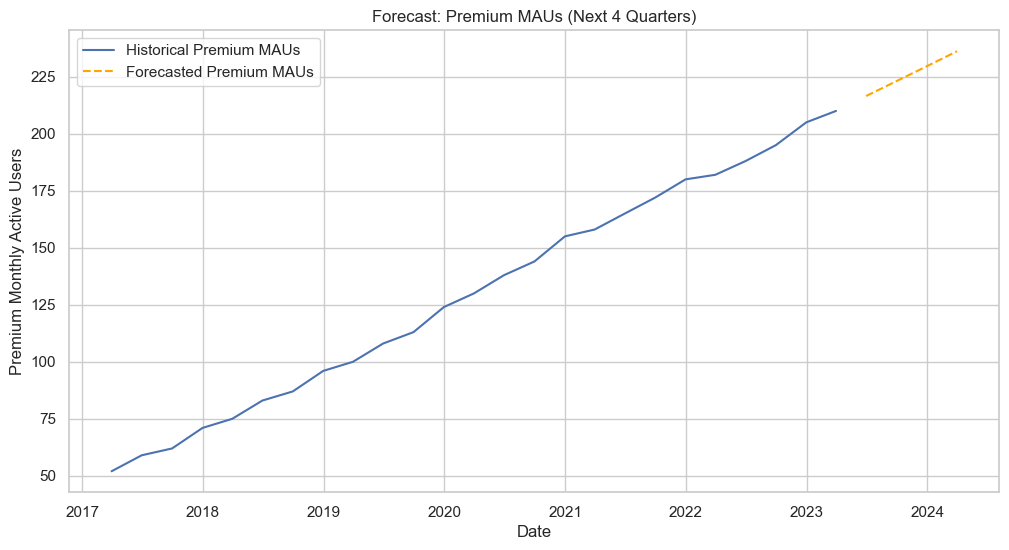

In [23]:


# --- Step 1: Visualize ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='premium_maus')
plt.title("Premium Monthly Active Users Over Time")
plt.ylabel("Premium MAUs")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# --- Step 2: ADF Test ---
adf_result = adfuller(df['premium_maus'].dropna())
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("‚úÖ Series is stationary")
    d = 0
    series_to_use = df['premium_maus']
else:
    print("üîÅ Series is non-stationary, applying first differencing")
    d = 1
    df['premium_maus_diff'] = df['premium_maus'].diff()
    series_to_use = df['premium_maus_diff'].dropna()

# --- Step 3: ARIMA Model ---
model = ARIMA(df['premium_maus'], order=(1, d, 1))
model_fit = model.fit()
print(model_fit.summary())

# --- Step 4: Forecast ---
forecast_steps = 4
forecast_premium_maus = model_fit.forecast(steps=forecast_steps)
forecast_dict['premium_maus'] = forecast_premium_maus


# --- Step 5: Plot Forecast ---
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='Q')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['premium_maus'], label='Historical Premium MAUs')
plt.plot(future_dates, forecast_premium_maus, label='Forecasted Premium MAUs', linestyle='--', color='orange')
plt.title("Forecast: Premium MAUs (Next 4 Quarters)")
plt.xlabel("Date")
plt.ylabel("Premium Monthly Active Users")
plt.legend()
plt.grid(True)
plt.show()


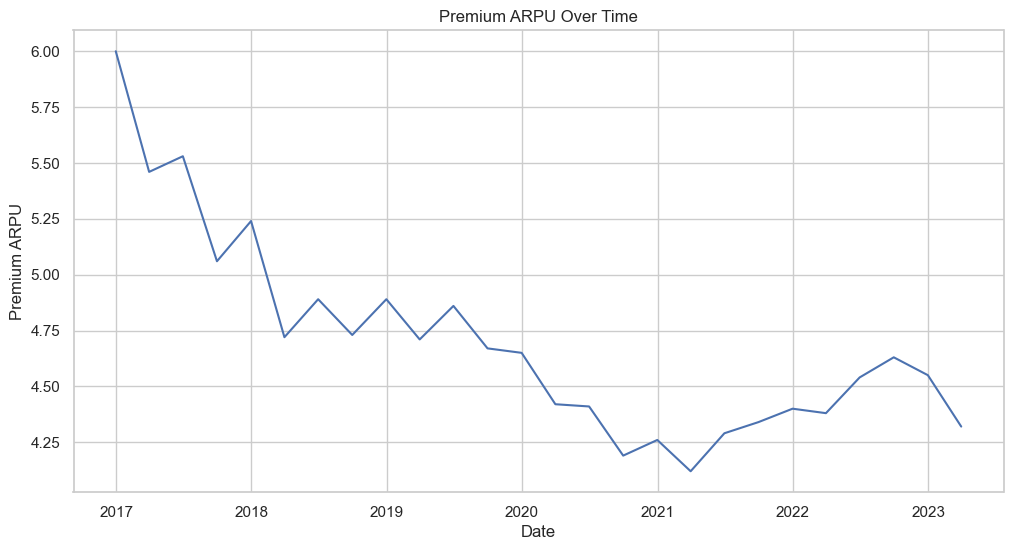

ADF Test Results:
ADF Statistic: -2.7838523627561593
p-value: 0.06061762024490776
üîÅ Series is non-stationary, applying first differencing
                               SARIMAX Results                                
Dep. Variable:           premium_arpu   No. Observations:                   26
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  10.486
Date:                Sat, 12 Apr 2025   AIC                            -14.971
Time:                        11:22:04   BIC                            -11.315
Sample:                    12-31-2016   HQIC                           -13.957
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9848      0.025    -38.747      0.000      -1.035   

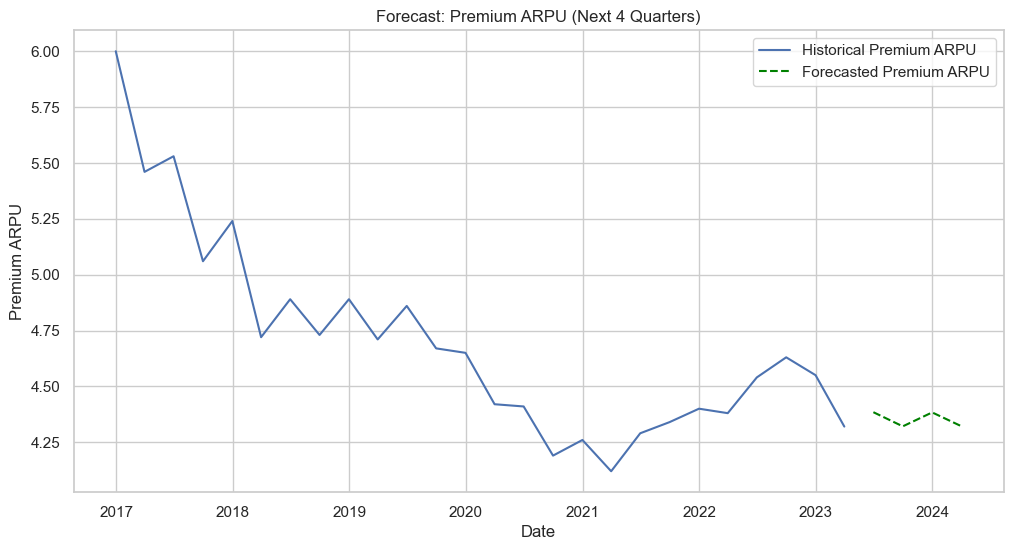

In [24]:

# --- Step 1: Visualize ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='premium_arpu')
plt.title("Premium ARPU Over Time")
plt.ylabel("Premium ARPU")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# --- Step 2: ADF Test ---
adf_result = adfuller(df['premium_arpu'].dropna())
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("‚úÖ Series is stationary")
    d = 0
    series_to_use = df['premium_arpu']
else:
    print("üîÅ Series is non-stationary, applying first differencing")
    d = 1
    df['premium_arpu_diff'] = df['premium_arpu'].diff()
    series_to_use = df['premium_arpu_diff'].dropna()

# --- Step 3: ARIMA Model ---
model = ARIMA(df['premium_arpu'], order=(1, d, 1))
model_fit = model.fit()
print(model_fit.summary())

# --- Step 4: Forecast ---
forecast_steps = 4
forecast_premium_arpu = model_fit.forecast(steps=forecast_steps)
forecast_dict['premium_arpu'] = forecast_premium_arpu


# --- Step 5: Plot Forecast ---
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='Q')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['premium_arpu'], label='Historical Premium ARPU')
plt.plot(future_dates, forecast_premium_arpu, label='Forecasted Premium ARPU', linestyle='--', color='green')
plt.title("Forecast: Premium ARPU (Next 4 Quarters)")
plt.xlabel("Date")
plt.ylabel("Premium ARPU")
plt.legend()
plt.grid(True)
plt.show()


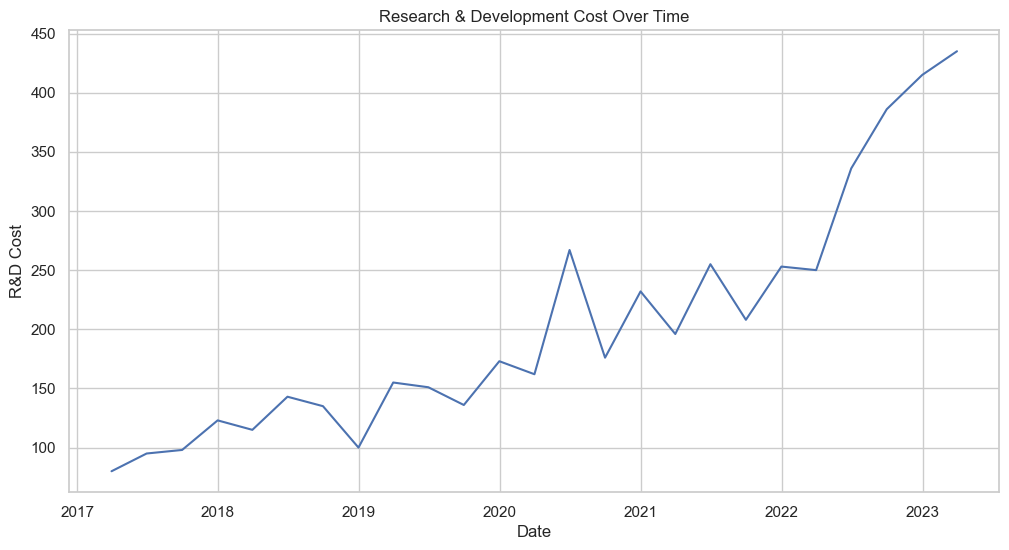

ADF Test Results:
ADF Statistic: 3.2773163866832657
p-value: 1.0
üîÅ Series is non-stationary, applying first differencing
                               SARIMAX Results                                
Dep. Variable:           r_and_d_cost   No. Observations:                   26
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -129.686
Date:                Sat, 12 Apr 2025   AIC                            265.371
Time:                        11:22:08   BIC                            269.028
Sample:                    12-31-2016   HQIC                           266.386
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8184      0.217     -3.770      0.000      -1.244      -0.393
ma.L1  

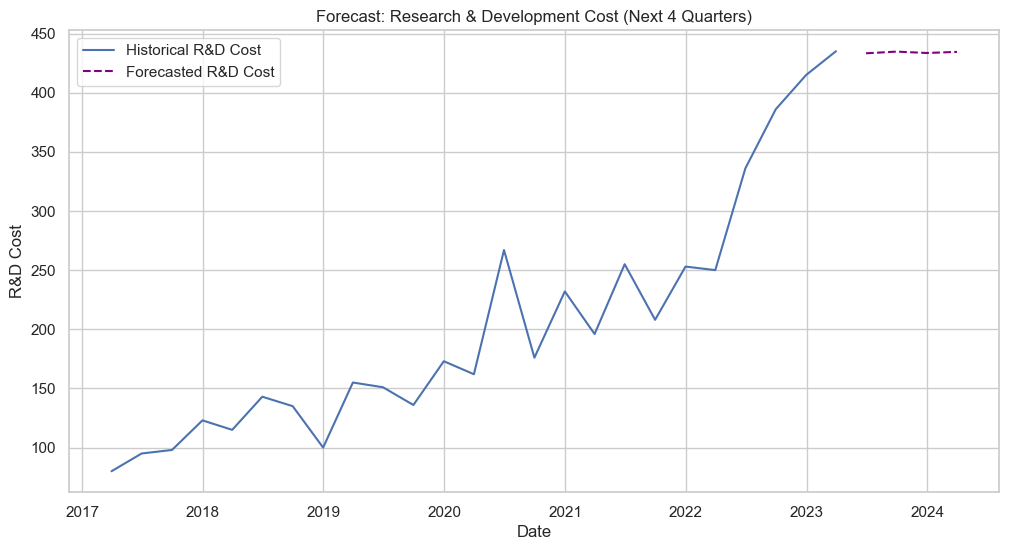

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# --- Step 0: Set date as index if not already ---
df['date'] = pd.to_datetime(df.index)
df.set_index('date', inplace=True)

# --- Step 1: Visualize R&D Cost over time ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='r_and_d_cost')
plt.title("Research & Development Cost Over Time")
plt.ylabel("R&D Cost")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# --- Step 2: ADF Test for Stationarity ---
adf_result = adfuller(df['r_and_d_cost'].dropna())
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("‚úÖ Series is stationary")
    d = 0
    series_to_use = df['r_and_d_cost']
else:
    print("üîÅ Series is non-stationary, applying first differencing")
    d = 1
    df['r_and_d_cost_diff'] = df['r_and_d_cost'].diff()
    series_to_use = df['r_and_d_cost_diff'].dropna()

# --- Step 3: Fit ARIMA model ---
model = ARIMA(df['r_and_d_cost'], order=(1, d, 1))
model_fit = model.fit()
print(model_fit.summary())

# --- Step 4: Forecast future R&D cost ---
forecast_steps = 4
forecast_randd_cost = model_fit.forecast(steps=forecast_steps)
forecast_dict['r_and_d_cost'] = forecast_randd_cost

# --- Step 5: Plotting the forecast ---
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='Q')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['r_and_d_cost'], label='Historical R&D Cost')
plt.plot(future_dates, forecast_randd_cost, label='Forecasted R&D Cost', linestyle='--', color='purple')
plt.title("Forecast: Research & Development Cost (Next 4 Quarters)")
plt.xlabel("Date")
plt.ylabel("R&D Cost")
plt.legend()
plt.grid(True)
plt.show()

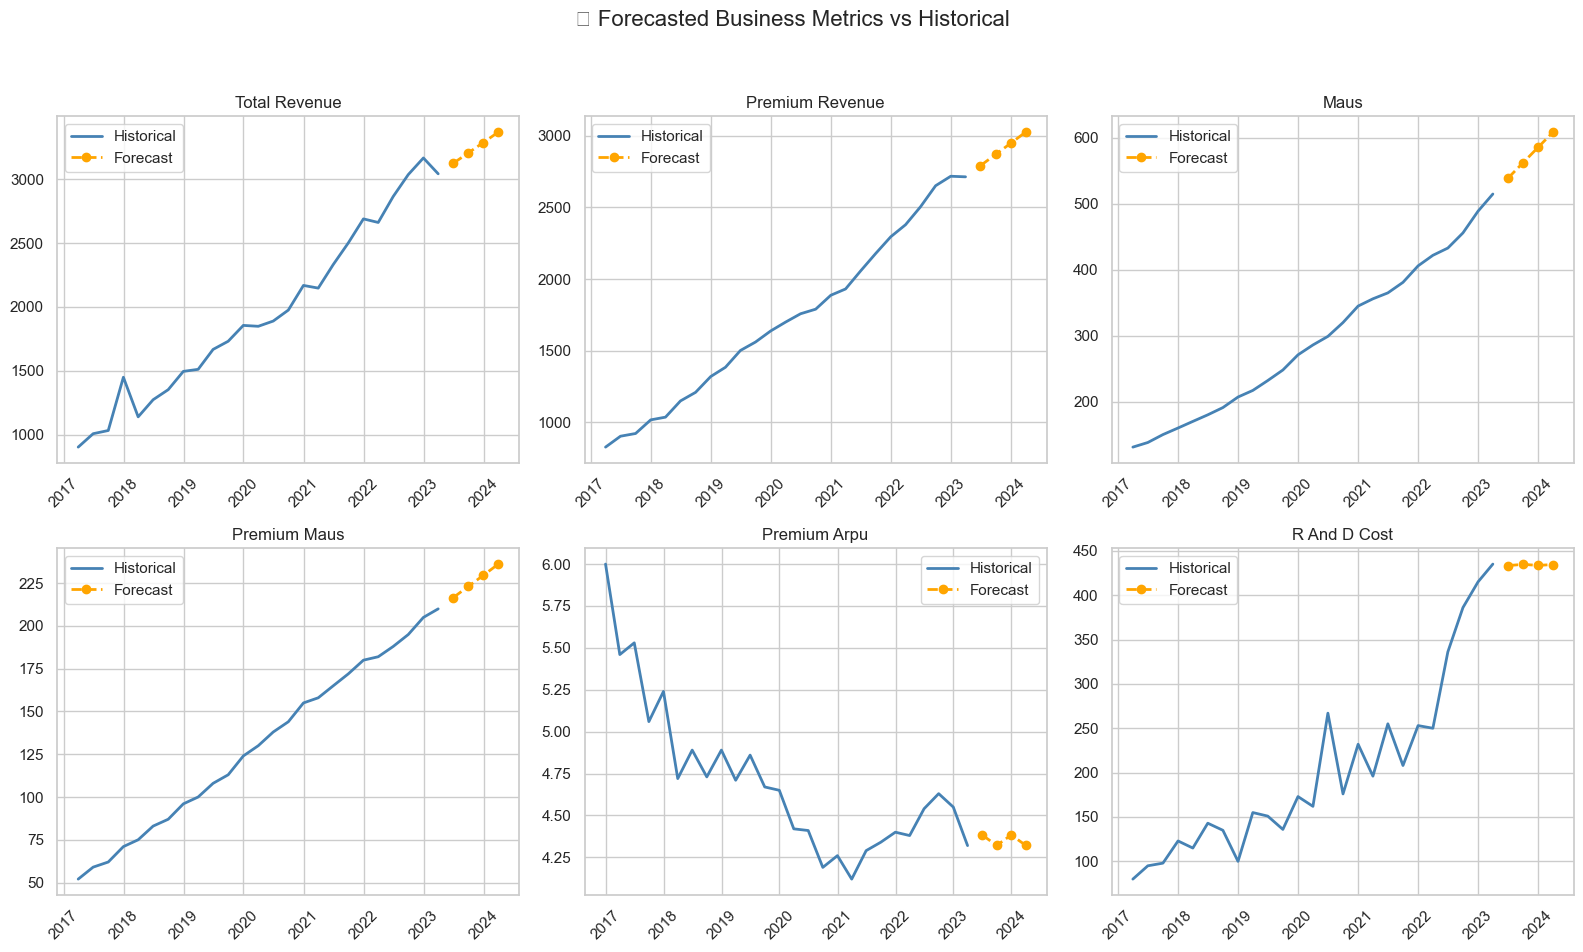

In [27]:
import matplotlib.pyplot as plt

# --- Setup ---
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("üìà Forecasted Business Metrics vs Historical", fontsize=16)

keys_to_plot = ['total_revenue', 'premium_revenue', 'maus', 'premium_maus', 'premium_arpu', 'r_and_d_cost']

# --- Plot each variable ---
for i, key in enumerate(keys_to_plot):
    row, col = divmod(i, 3)

    # Plot historical
    axs[row, col].plot(df[key], label="Historical", color='steelblue', linewidth=2)

    # Plot forecast
    axs[row, col].plot(forecast_dict['date'], forecast_dict[key], label="Forecast", color='orange', linestyle='--', linewidth=2, marker='o')

    axs[row, col].set_title(key.replace('_', ' ').title(), fontsize=12)
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].legend()

# --- Final touches ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [28]:
print("üìä Forecasted Values (Next 4 Quarters):\n")

for key in ['total_revenue', 'premium_revenue', 'maus', 'premium_maus', 'premium_arpu', 'r_and_d_cost']:
    print(f"üîπ {key.replace('_', ' ').title()}")
    for date, value in zip(forecast_dict['date'], forecast_dict[key]):
        print(f"   {date.strftime('%Y-%m-%d')}: {value:,.2f}")
    print("-" * 40)


üìä Forecasted Values (Next 4 Quarters):

üîπ Total Revenue
   2023-06-30: 3,123.67
   2023-09-30: 3,205.34
   2023-12-31: 3,287.00
   2024-03-31: 3,368.67
----------------------------------------
üîπ Premium Revenue
   2023-06-30: 2,791.01
   2023-09-30: 2,869.02
   2023-12-31: 2,947.03
   2024-03-31: 3,025.03
----------------------------------------
üîπ Maus
   2023-06-30: 538.74
   2023-09-30: 562.31
   2023-12-31: 585.72
   2024-03-31: 608.96
----------------------------------------
üîπ Premium Maus
   2023-06-30: 216.54
   2023-09-30: 223.09
   2023-12-31: 229.63
   2024-03-31: 236.17
----------------------------------------
üîπ Premium Arpu
   2023-06-30: 4.38
   2023-09-30: 4.32
   2023-12-31: 4.38
   2024-03-31: 4.32
----------------------------------------
üîπ R And D Cost
   2023-06-30: 433.28
   2023-09-30: 434.69
   2023-12-31: 433.53
   2024-03-31: 434.48
----------------------------------------


# üìà Business Use Cases of Forecasted Data

We‚Äôve forecasted the following key features using ARIMA:

- `total_revenue`
- `premium_revenue`
- `maus` (Monthly Active Users)
- `premium_maus`
- `premium_arpu`
- `r_and_d_cost`

---

## ‚úÖ How Businesses Can Use These Forecasts

---

### 1. üí∞ Revenue Planning & Target Setting
- **Use Case**: Set realistic revenue goals and growth targets.
- **Example**: If `premium_revenue` is projected to grow by 15%, align marketing, sales, and operations to meet those expectations.
- **Our Case**: As forecast for `total_revenue` is increasing, we need to **scale marketing and strengthen customer support and logistics to meet demand**.

---

### 2. üíé Premium Revenue Acceleration
- **Use Case**: Premium revenue is a strong revenue contributor.
- **Example**: A growing premium segment justifies better premium onboarding or upsell strategies.
- **Our Case**: As forecast for `premium_revenue` is increasing, we need to **invest in premium feature promotion and exclusive content to attract more paid users**.

---

### 3. üë• User Growth & Engagement Strategy
- **Use Case**: Analyze `maus` and `premium_maus` to understand platform health.
- **Example**: If user growth slows, launch campaigns or loyalty features to improve retention and conversion.
- **Our Case**: As forecast for `maus` is increasing, we need to **ensure seamless onboarding and roll out gamified user engagement features**.

---

### 4. üéØ Premium User Conversion
- **Use Case**: Growing `premium_maus` indicates healthy monetization funnel.
- **Example**: Convert more MAUs into paid subscribers using trials or benefits.
- **Our Case**: As forecast for `premium_maus` is increasing, we need to **launch referral programs and upgrade nudges to boost free-to-paid conversions**.

---

### 5. üí∏ Monetization Optimization via ARPU
- **Use Case**: Monitor `premium_arpu` to evaluate monetization efficiency.
- **Example**: Flat ARPU? Consider upselling features, pricing tiers, or bundles.
- **Our Case**: As forecast for `premium_arpu` is flat, we need to **introduce tiered pricing, bundled offerings, or exclusive add-ons**.

---

### 6. üß™ Product Investment & R&D Budgeting
- **Use Case**: Forecasted `r_and_d_cost` guides innovation funding and engineering capacity planning.
- **Example**: Plan new hires or project launches based on predicted budget needs.
- **Our Case**: As forecast for `r_and_d_cost` is steady, we need to **allocate resources to high-impact innovation and monitor ROI from R&D initiatives**.

---

### 7. üìâ Budget Allocation & Cost Efficiency
- **Use Case**: Optimize costs like `r_and_d_cost` to maintain profitability.
- **Example**: Reallocate unused budgets from slow-growth areas to fast-growing ones.
- **Our Case**: As forecast shows manageable costs, we need to **focus on lean operations and cost-effective growth strategies**.

---

### 8. üìä Investor Relations & Strategic Planning
- **Use Case**: Use forecasts in investor decks, board meetings, and quarterly planning.
- **Example**: ‚ÄúWe anticipate 20% growth in premium users and 12% rise in ARPU by Q4 2025.‚Äù
- **Our Case**: As forecast highlights consistent growth, we need to **showcase these trends to investors to attract funding and build trust**.

---

### 9. ‚ö†Ô∏è Scenario Planning & Risk Management
- **Use Case**: Create simulations using upper/lower forecast bounds.
- **Example**: Prepare responses to revenue dips, user churn, or cost spikes.
- **Our Case**: As forecast trends are positive but modest, we need to **prepare contingency plans for any economic or operational disruptions**.

---

## üîÑ Department-Wise Operational Usage

| üë• Team        | üìå Usage Example |
|----------------|------------------|
| **Finance**    | Budgeting, cost planning, profit margin analysis |
| **Product**    | Feature development, user engagement roadmaps |
| **Marketing**  | Growth campaigns, CAC vs LTV optimization |
| **R&D**        | Resource allocation, innovation ROI planning |
| **Sales**      | Forecasting targets, lead pipeline strategy |
| **Executives** | Strategic decisions, quarterly OKRs, investor communication |


In [30]:
# Reset index so 'date' becomes a column again
df_reset = df.reset_index()

# Save as CSV
df_reset.to_csv("formatted_original_data.csv", index=False)

# Save forecast_df to a CSV file
forecast_df.to_csv("forecast_output.csv", index=False)

2025-04-12 11:40:57.469 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 11:40:57.469 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 11:40:57.616 
  command:

    streamlit run C:\Users\gunav\anaconda3\envs\spotify-forecast\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-12 11:40:57.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 11:40:57.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 11:40:57.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 11:40:57.616 Thread 'MainThread': missing ScriptRunContext! This warning ca

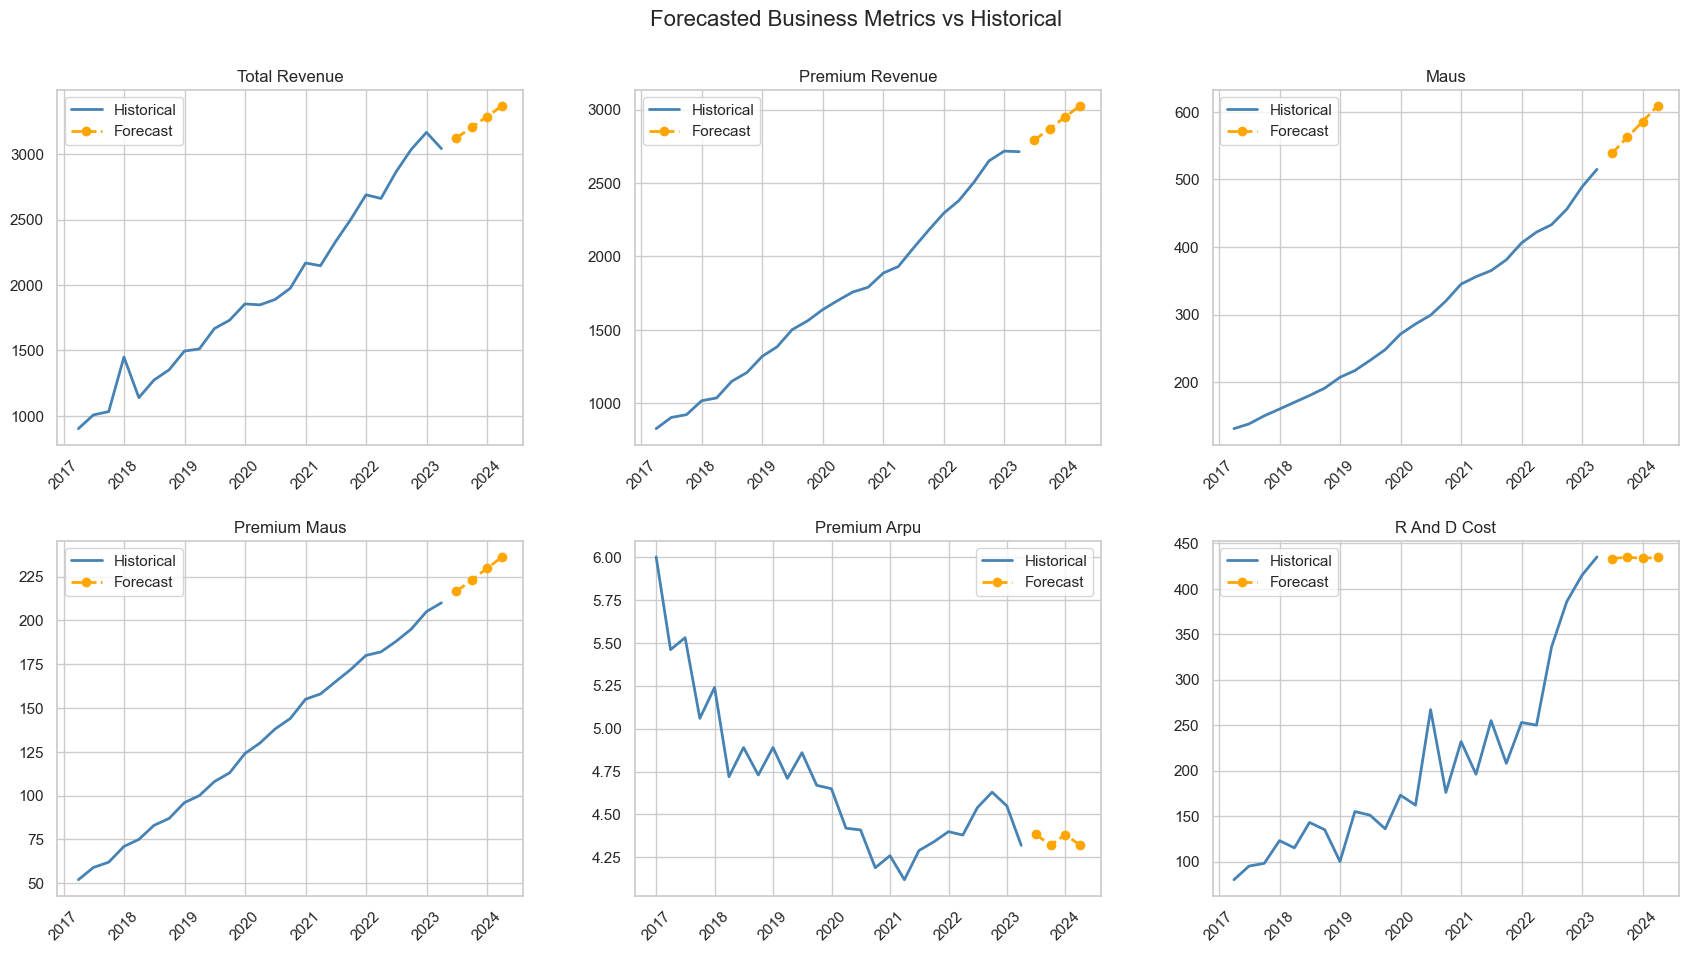

In [31]:
# app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# ---------- Load Your Data ----------
# Replace this with your actual data loading
df = pd.read_csv("formatted_original_data.csv")  # e.g., with 'date', 'total_revenue', ...
forecast_df = pd.read_csv("forecast_output.csv")  # e.g., with 'date', 'total_revenue', ...

# Convert date columns
df['date'] = pd.to_datetime(df['date'])
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

# ---------- Streamlit Setup ----------
st.set_page_config(page_title="üìä Business Forecast Dashboard", layout="wide")
st.title("üìà Business Forecast Dashboard")
st.markdown("Visualizing key business metrics with actionable insights for the next 4 quarters.")

# ---------- Plot Section ----------
st.header("üìä Forecasted Metrics vs Historical Trends")

keys_to_plot = ['total_revenue', 'premium_revenue', 'maus', 'premium_maus', 'premium_arpu', 'r_and_d_cost']
n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 10))
fig.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.9)
fig.suptitle("Forecasted Business Metrics vs Historical", fontsize=16)

for i, key in enumerate(keys_to_plot):
    row, col = divmod(i, n_cols)
    axs[row, col].plot(df['date'], df[key], label="Historical", color='steelblue', linewidth=2)
    axs[row, col].plot(forecast_df['date'], forecast_df[key], label="Forecast", color='orange', linestyle='--', marker='o', linewidth=2)
    axs[row, col].set_title(key.replace('_', ' ').title(), fontsize=12)
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].legend()

st.pyplot(fig)

# ---------- Actions Section ----------
st.header("‚úÖ Action Plan Based on Forecasts")

forecast_actions = {
    "total_revenue": "As forecast for `total_revenue` is increasing, scale marketing and strengthen customer support and logistics to meet demand.",
    "premium_revenue": "As forecast for `premium_revenue` is increasing, invest in premium feature promotion and exclusive content to attract more paid users.",
    "maus": "As forecast for `maus` is increasing, ensure seamless onboarding and roll out gamified user engagement features.",
    "premium_maus": "As forecast for `premium_maus` is increasing, launch referral programs and upgrade nudges to boost free-to-paid conversions.",
    "premium_arpu": "As forecast for `premium_arpu` is flat, introduce tiered pricing, bundled offerings, or exclusive add-ons.",
    "r_and_d_cost": "As forecast for `r_and_d_cost` is steady, allocate resources to high-impact innovation and monitor ROI from R&D initiatives."
}

for key in keys_to_plot:
    st.subheader(f"üìå {key.replace('_', ' ').title()}")
    st.markdown(forecast_actions[key])
